In [1]:
%reload_ext autoreload
%autoreload 2

import math
import sys
from pathlib import Path

import numpy as np
import pandas as pd
from azureml.core import Workspace
from azureml.core.dataset import Dataset
from glob2 import glob
import matplotlib.pyplot as plt

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import find_outlier_qrcodes, convert_age_from_days_to_years, draw_age_distribution, draw_sex_distribution, calculate_code_age_distribution

In [2]:
DATASET_PATH = Path('/mnt/datasets/realtime_evaluation')

In [3]:
# Takes more than 53min therefore commented out
# rgb_files = glob(str(DATASET_PATH / 'RGB/**/*.jpg'))
# len(rgb_files)

In [4]:
artifacts = pd.read_csv(DATASET_PATH / 'labels/realworld__depthmap_data.csv')
print("Total no. of artifacts:", len(artifacts))
artifacts.head()

Total no. of artifacts: 100588


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,storage_path,height,weight,muac,scan_group,key,tag,age,sex,qrcode
0,6V7ZlPtGlwXry9jF_artifact-scan-pcd_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa
1,6V7ZlPtGlwXry9jF_artifact-scan-pcd_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa
2,6V7ZlPtGlwXry9jF_artifact-scan-pcd_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa
3,6V7ZlPtGlwXry9jF_artifact-scan-pcd_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa
4,6V7ZlPtGlwXry9jF_artifact-scan-pcd_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa


In [5]:
artifacts.describe()

,height,weight,muac,key,age
count,100588.000000,100588.000000,100588.000000,100588.000000,100588.000000
mean,88.590138,11.503907,14.102531,107.695133,1203.135613
std,10.345305,2.374155,1.056257,24.995791,432.491910
min,10.500000,4.400000,10.000000,100.000000,0.000000
25%,81.800000,9.800000,13.400000,101.000000,882.000000
50%,89.600000,11.600000,14.100000,101.000000,1240.000000
75%,95.900000,13.200000,14.800000,102.000000,1552.000000
max,192.200000,19.950000,17.700000,202.000000,2121.000000


In [6]:
#adding the Years column into dataframe
artifacts['Years'] = artifacts.apply(convert_age_from_days_to_years, axis=1)
artifacts.head()

,id,storage_path,height,weight,muac,scan_group,key,tag,age,sex,qrcode,Years
0,6V7ZlPtGlwXry9jF_artifact-scan-pcd_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa,4
1,6V7ZlPtGlwXry9jF_artifact-scan-pcd_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa,4
2,6V7ZlPtGlwXry9jF_artifact-scan-pcd_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa,4
3,6V7ZlPtGlwXry9jF_artifact-scan-pcd_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa,4
4,6V7ZlPtGlwXry9jF_artifact-scan-pcd_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa,4


In [7]:
scans = artifacts.drop_duplicates(subset='qrcode',keep ='first')
print("Total no. of children:", len(scans))

Total no. of children: 3000


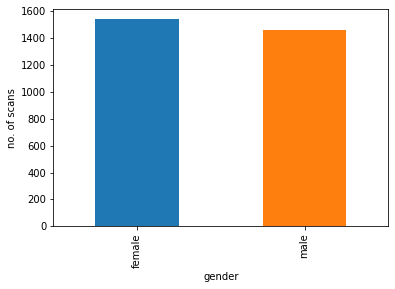

In [8]:
plt.figure()
draw_sex_distribution(scans)
plt.show()

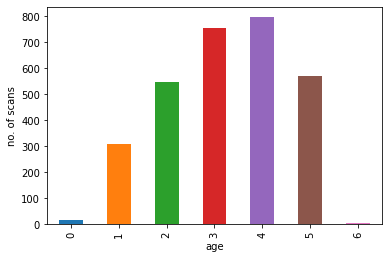

In [9]:
plt.figure()
draw_age_distribution(scans)
plt.show()

101    47172
102    23533
100    23152
201     2672
200     2045
202     2014
Name: key, dtype: int64


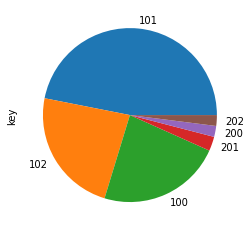

In [10]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['key'].value_counts())
_ = artifacts['key'].value_counts().plot(kind='pie')

In [11]:
calculate_code_age_distribution(artifacts)

,0,1,2,3,4
codes,,,,,
100,109,1013,4146,6340,6810
101,238,1507,7843,13674,14742
102,101,1201,4319,6345,6699
200,69,1547,376,28,25
201,62,1995,512,44,59
202,44,1586,332,28,24


In [12]:
calculate_code_age_distribution(scans)

,0,1,2,3,4
codes,,,,,
100,11,131,504,752,792
200,6,177,45,4,3
101,0,0,0,0,1


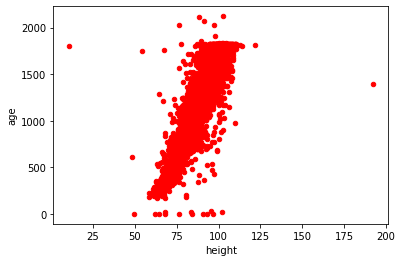

In [13]:
#distribution of height against age
height_vs_age = scans.plot.scatter(x='height', y='age', c='red')

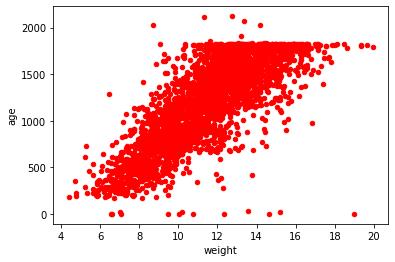

In [14]:
#distribution of weight against age
weight_vs_age = scans.plot.scatter(x='weight',
                      y='age',
                      c='red')

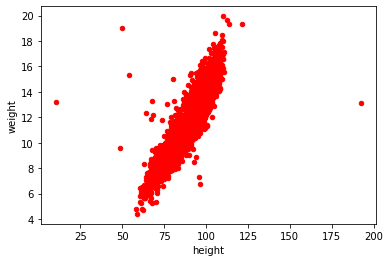

In [15]:
## distribution of height against weight
weight_vs_height = scans.plot.scatter(x='height', y='weight', c='red')

In [16]:
good_qrc = scans[scans['tag'] == 'good']['qrcode'].unique()
bad_qrc = scans[scans['tag'] == 'bad']['qrcode'].unique()
print("Total good qrcodes:", len(good_qrc))
print("Total bad qrcodes:", len(bad_qrc))

Total good qrcodes: 2383
Total bad qrcodes: 602


## Analyze outliers: 1) age, 2) weight, 3) height, 4) MUAC

In [17]:
artifacts.describe()

,height,weight,muac,key,age,Years
count,100588.000000,100588.000000,100588.000000,100588.000000,100588.000000,100588.000000
mean,88.590138,11.503907,14.102531,107.695133,1203.135613,3.287599
std,10.345305,2.374155,1.056257,24.995791,432.491910,1.238446
min,10.500000,4.400000,10.000000,100.000000,0.000000,0.000000
25%,81.800000,9.800000,13.400000,101.000000,882.000000,2.000000
50%,89.600000,11.600000,14.100000,101.000000,1240.000000,3.000000
75%,95.900000,13.200000,14.800000,102.000000,1552.000000,4.000000
max,192.200000,19.950000,17.700000,202.000000,2121.000000,6.000000


### 1) Check age

##### Check age < 6 months or  > 6 years

In [18]:
find_outlier_qrcodes(artifacts, 'age', '<365/2')

['1584997869-2f4en811rc',
 '1585016701-1jny2rideq',
 '1585016734-7v4g0jd834',
 '1585271214-8brq5raxu9',
 '1585365927-r2gdowfaus',
 '1597602232-8y2xmw4jxh',
 '1597612326-3jwkp3hqm4',
 '1597628974-gnhqmt2lc9',
 '1597929175-s2xa3r6qxb',
 '1597959201-cdh3nzurz9',
 '1598004797-25ev2qs0tp',
 '1598079550-hzdmi3o7ko',
 '1598103263-yen7e381r9',
 '1598150765-1d0jctea8v',
 '1598182099-cyc43kdirx',
 '1598261064-nuwoyox9av',
 '1598341800-7kao2jnlbf']

In [19]:
find_outlier_qrcodes(artifacts, 'age', '>365*6')

[]

### 2) Check weight

In [20]:
find_outlier_qrcodes(artifacts, 'weight', '<5.0')

['1597609986-gdgugh9uu5',
 '1597814521-3wg8as3col',
 '1598117850-v2o0qhdbju',
 '1598278297-c1h5atpk76']

In [21]:
find_outlier_qrcodes(artifacts, 'weight', '>30.0')

[]

### 3) Check height

In [22]:
find_outlier_qrcodes(artifacts, 'height', '<40.0')

['1598211458-e3wx4hygnq']

In [23]:
find_outlier_qrcodes(artifacts, 'height', '>150.0')

['1585357787-ko2s9g4cnz']

### 4) Check MUAC

In [24]:
artifacts.describe()

,height,weight,muac,key,age,Years
count,100588.000000,100588.000000,100588.000000,100588.000000,100588.000000,100588.000000
mean,88.590138,11.503907,14.102531,107.695133,1203.135613,3.287599
std,10.345305,2.374155,1.056257,24.995791,432.491910,1.238446
min,10.500000,4.400000,10.000000,100.000000,0.000000,0.000000
25%,81.800000,9.800000,13.400000,101.000000,882.000000,2.000000
50%,89.600000,11.600000,14.100000,101.000000,1240.000000,3.000000
75%,95.900000,13.200000,14.800000,102.000000,1552.000000,4.000000
max,192.200000,19.950000,17.700000,202.000000,2121.000000,6.000000


no unusual values

### rgb data scans

In [25]:
## reading the rgb csv files
rgb_artifacts = pd.read_csv(DATASET_PATH / 'labels/realworld__rgb_data.csv')
rgb_artifacts

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,paths,id,storage_path,height,weight,muac,scan_group,key,tag,age,sex,qrcode
0,rgb_1583462505-43bak4gvfa_1591122173510_100_10...,6V7ZlPtGlwXry9jF_artifact-scan-rgb_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa
1,rgb_1583462505-43bak4gvfa_1591122173510_100_10...,6V7ZlPtGlwXry9jF_artifact-scan-rgb_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa
2,rgb_1583462505-43bak4gvfa_1591122173510_100_10...,6V7ZlPtGlwXry9jF_artifact-scan-rgb_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa
3,rgb_1583462505-43bak4gvfa_1591122173510_100_10...,6V7ZlPtGlwXry9jF_artifact-scan-rgb_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa
4,rgb_1583462505-43bak4gvfa_1591122173510_100_10...,6V7ZlPtGlwXry9jF_artifact-scan-rgb_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa
5,rgb_1583462505-43bak4gvfa_1591122173510_100_10...,6V7ZlPtGlwXry9jF_artifact-scan-rgb_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa
6,rgb_1583462505-43bak4gvfa_1591122173510_100_10...,6V7ZlPtGlwXry9jF_artifact-scan-rgb_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa
7,rgb_1583462505-43bak4gvfa_1591122173510_100_10...,6V7ZlPtGlwXry9jF_artifact-scan-rgb_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa
8,rgb_1583462505-43bak4gvfa_1591122173510_100_10...,6V7ZlPtGlwXry9jF_artifact-scan-rgb_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa
9,rgb_1583462505-43bak4gvfa_1591122173510_100_10...,6V7ZlPtGlwXry9jF_artifact-scan-rgb_15666912000...,qrcode/1583462505-43bak4gvfa/measure/159112217...,95.5,13.2,14.4,NaN,100,good,1310,male,1583462505-43bak4gvfa


101    169256
100     80747
102     79823
201      9150
202      7075
200      6967
Name: key, dtype: int64


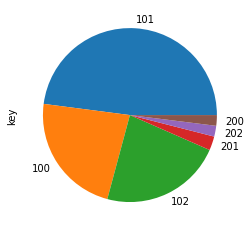

In [26]:
print(rgb_artifacts['key'].value_counts())
_ = rgb_artifacts['key'].value_counts().plot(kind='pie')